# 2 Using ComputationalGraphPrimer

### 2.2 one_neuron_classifier.py & multi_neuron_classifier.py
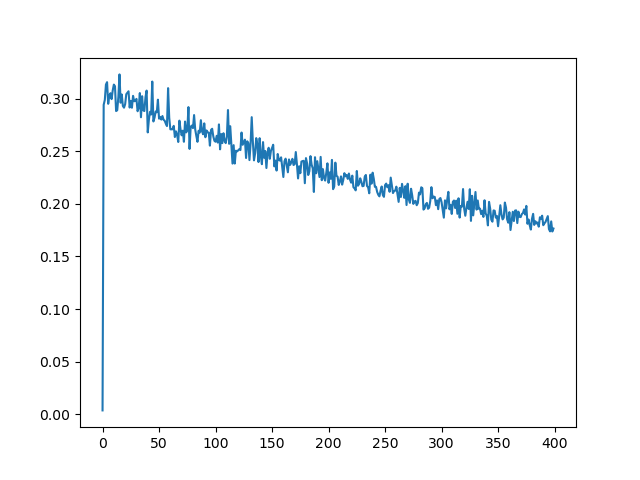

Fig 1: Execute one_neuron_classifier.py

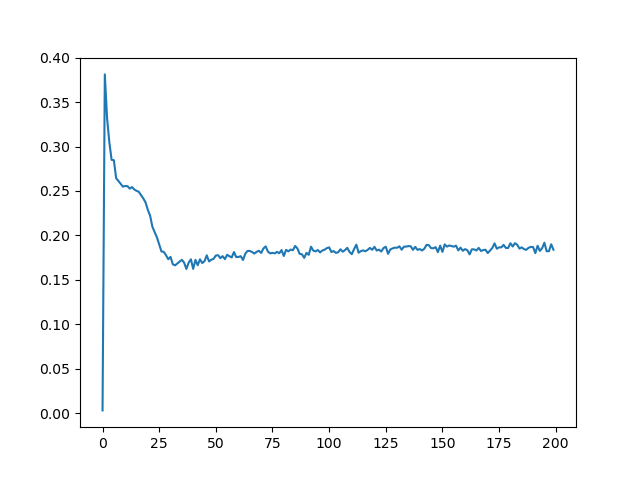

Fig 2: Execute multi_neuron_classifier.py

### 2.3
### verify_with_torchnn.py
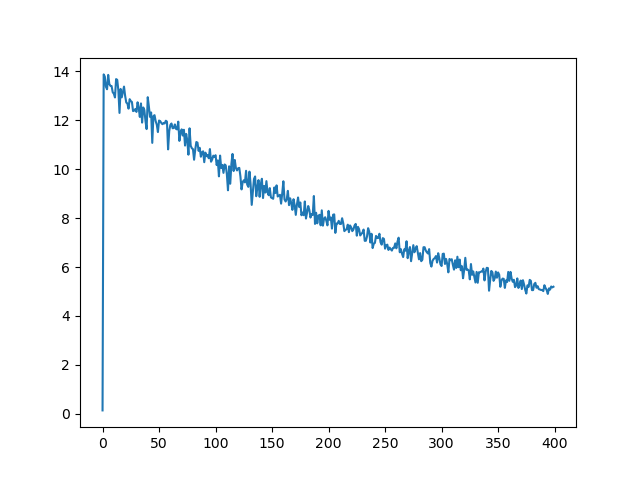

Fig 3: Execute python verify_with_torchnn.py (multi_neuron)

The curve is smoother than handcrafted one. And the final result shows that the handcrafted model learn better than the torch.nn model. The handcrafted model finish learning at about iteration 100.

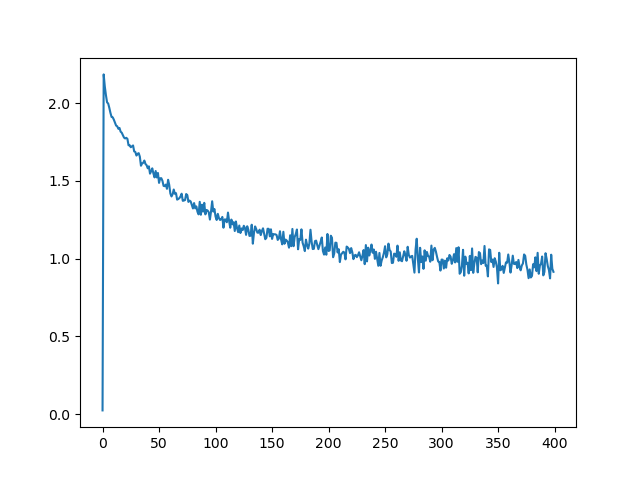

Fig 4: Execute python verify_with_torchnn.py (one_neuron)
The curve is smoother than handcrafted one. And the final result shows that the handcrafted model learn better than the torch.nn model.



# 3. Implementing SGD+ and Adam
In order to implement SGD, SGD+, and Adam, I created two subclasses of ComputationalGraphPrimer, SGDPlus_ComputationalGraphPrimer and Adam_ComputationalGraphPrimer. To add these feature, we need to override the back propagation method. The provided back propagation method already uses a gradient-based update rule, parameters are updated using a combination of the learning rate and the gradients calculated for each data sample. So the mission for us is to adjust the weight update for each subclass. 

Normal SGD weight update:

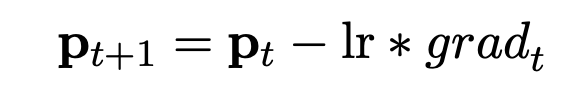

SGD with momentum weight update:

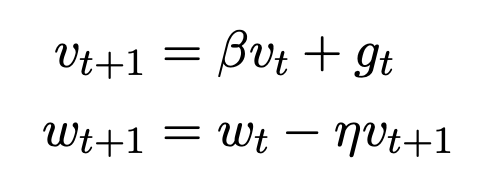

Adaptive Moment Estimation weight update:

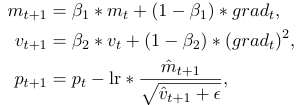


For SGD_ComputationalGraphPrimer, what I did is inherent ComputationalGraphPrimer class and override run_training_loop_one_neuron_model and **return loss_running_record** without plotting figure, this work the same for all the other class. 

For backprop_and_update_params_one_neuron_model of SGDPlus_ComputationalGraphPrimer, the learnable weight update just follow the function vt+1 = βvt +gt and wt+1 = wt −ηvt+1, learnable weight(including bias) will be updated. 

In [ ]:
# vt+1 = βvt +gt
# wt+1 = wt −ηvt+1
self.velocity4params[param] = self.beta * self.velocity4params[param] + partial_of_loss_wrt_param # vt+1 = βvt +gt
step = self.learning_rate * self.velocity4params[param] # ηvt+1
self.vals_for_learnable_params[param] += step # wt+1 = wt −ηvt+1

y_error_avg = sum(y_errors_in_batch) / float(self.batch_size)
deriv_sigmoid_avg = sum(deriv_sigmoids) / float(self.batch_size)
self.velocity4bias = self.beta * self.velocity4bias + y_error_avg * deriv_sigmoid_avg # vb t+1 = βvb t +gb t
step = self.learning_rate * self.velocity4bias # ηvb t+1
self.bias += step # bt+1 = bt −ηvb t+1

For multilayer one, add a for loop outside, and iterate each parameter and update it.

In [ ]:
for param in partial_of_loss_wrt_params: 
    partial_of_loss_wrt_param = partial_of_loss_wrt_params[param] /  float(self.batch_size)   
    self.velocity4params[param] = self.beta * self.velocity4params[param] + partial_of_loss_wrt_param # vt+1 = βvt +gt
    step = self.learning_rate * self.velocity4params[param] # ηvt+1
    self.vals_for_learnable_params[param] += step # wt+1 = wt −ηvt+1
for layer_index in range(1,self.num_layers):           
    for k in range(self.layers_config[layer_index]):
        self.velocity4bias[layer_index][k] = self.beta * self.velocity4bias[layer_index][k] + bias_changes[layer_index][k] / float(self.batch_size)
        step = self.learning_rate * self.velocity4bias[layer_index][k]
        self.bias[layer_index][k] += step

For ADAM, what we need to do is change the equation of the update function, just like what we did for SGD+, follow the given math function and update the parameter.
One Neuron:

In [ ]:
# The function we need to implement
# mt+1 = β1 * mt + (1 - β1) * gradt
# vt+1 = β2 * vt + (1 - β2) * (gradt)^2
# ˆmt+1 = mt+1 / (1 - β1^t)
# ˆvt+1 = vt+1 / (1 - β2^t)
# pt+1 = pt - lr * (ˆmt+1 / (sqrt(ˆvt+1 + ϵ)))
self.moment4params[param] = self.beta1 * self.moment4params[param] + (1 - self.beta1)*partial_of_loss_wrt_param
self.velocity4params[param] = self.beta2 * self.velocity4params[param] + (1 - self.beta2)*partial_of_loss_wrt_param**2
moment_hat = self.moment4params[param] / (1 - self.beta1**(self.t))
velocity_hat = self.velocity4params[param] / (1 - self.beta2**(self.t))
step = self.learning_rate * moment_hat / (np.sqrt(velocity_hat + self.epsilon))
self.vals_for_learnable_params[param] += step

y_error_avg = sum(y_errors_in_batch) / float(self.batch_size)
deriv_sigmoid_avg = sum(deriv_sigmoids) / float(self.batch_size)

self.moment4bias = self.beta1 * self.moment4bias + (1 - self.beta1)*y_error_avg
self.velocity4bias = self.beta2 * self.velocity4bias + (1 - self.beta2)*y_error_avg**2
moment_hat = self.moment4bias / (1 - self.beta1**(self.t))
velocity_hat = self.velocity4bias / (1 - self.beta2**(self.t))
step = self.learning_rate * moment_hat / (np.sqrt(velocity_hat + self.epsilon))
self.bias += step

Multi Neuron:

In [ ]:
for param in partial_of_loss_wrt_params: 
    partial_of_loss_wrt_param = partial_of_loss_wrt_params[param] /  float(self.batch_size)   
    self.moment4params[param] = self.beta1 * self.moment4params[param] + (1 - self.beta1)*partial_of_loss_wrt_param
    self.velocity4params[param] = self.beta2 * self.velocity4params[param] + (1 - self.beta2)*partial_of_loss_wrt_param**2
    moment_hat = self.moment4params[param] / (1 - self.beta1**(self.t))
    velocity_hat = self.velocity4params[param] / (1 - self.beta2**(self.t))
    step = self.learning_rate * moment_hat / (np.sqrt(velocity_hat + self.epsilon))
    self.vals_for_learnable_params[param] += step

for layer_index in range(1,self.num_layers):           
    for k in range(self.layers_config[layer_index]):
        self.moment4bias[layer_index][k] = self.beta1 * self.moment4bias[layer_index][k] + (1 - self.beta1)*bias_changes[layer_index][k] / float(self.batch_size)
        self.velocity4bias[layer_index][k] = self.beta2 * self.velocity4bias[layer_index][k] + (1 - self.beta2)*bias_changes[layer_index][k]**2 / float(self.batch_size)
        moment_hat = self.moment4bias[layer_index][k] / (1 - self.beta1**(self.t))
        velocity_hat = self.velocity4bias[layer_index][k] / (1 - self.beta2**(self.t))
        step = self.learning_rate * moment_hat / (np.sqrt(velocity_hat + self.epsilon))
        self.bias[layer_index][k] += step

# Code Output, Performance Analysis, and Hyperparameters Tuning 
### Code Output & Performance Analysis
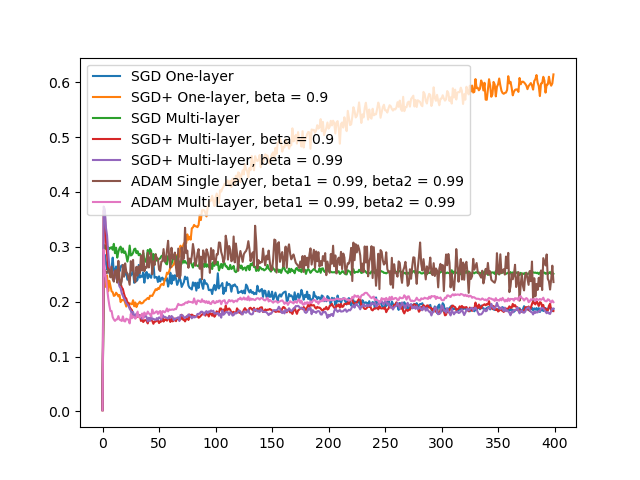

Figure 1

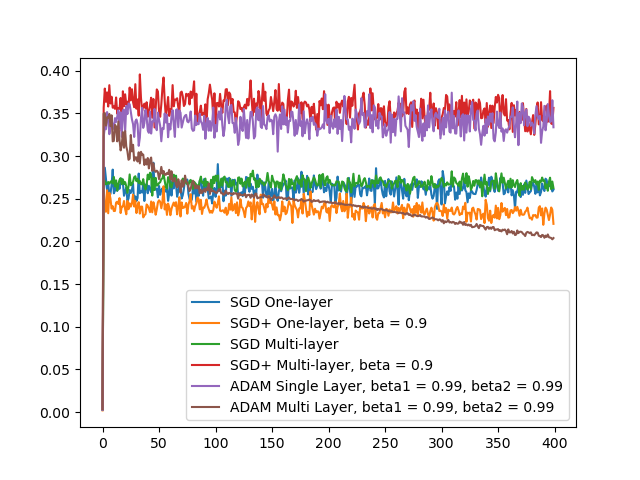

Figure 2


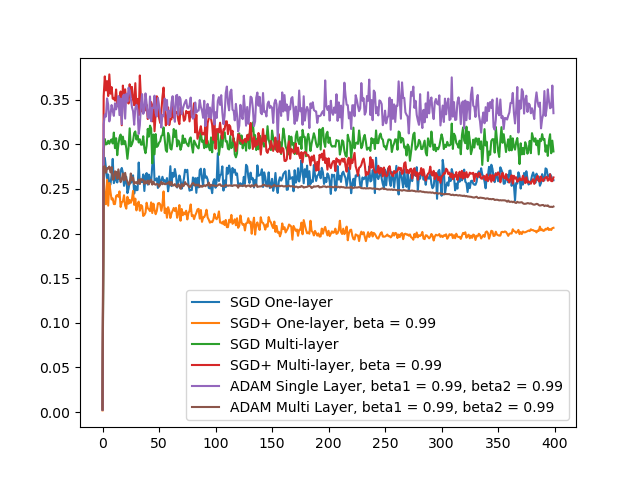

Figure 3

These figures provide an overview of model performance with different beta values and the same learning rate for each figure: **1e-3 for Figure 1, 1e-5 for Figure 2, and 1e-5 for Figure 3**. With this hyperparameter configuration, SGD+, ADAM, and single-layer SGD generally perform the best. Multi-layer models typically outperform single-layer models due to their increased capacity to capture more complex patterns in the data. Additionally, ADAM tends to perform the best overall, as its adaptive learning rate adjustments accelerate convergence. This can be clearly seen in Figure 2, where ADAM shows a faster decrease in loss compared to the other models.

Interestingly, single-layer SGD performs similarly to ADAM when the same random seed is used. This is likely due to SGD starting closer to the loss minimum, which gives it an advantage in this case. However, when the random seed is changed, ADAM and SGD+ both outperform single-layer SGD, demonstrating their superior performance with different initializations.

Comparing Figure 2 and Figure 3, we observe that the larger the beta values, the better the performance of both ADAM and SGD+. The increased beta values help improve optimization by providing momentum to the parameter updates, which results in faster convergence and lower loss. This trend will be further validated and discussed in later sections.



### Effect of Hyperparameters
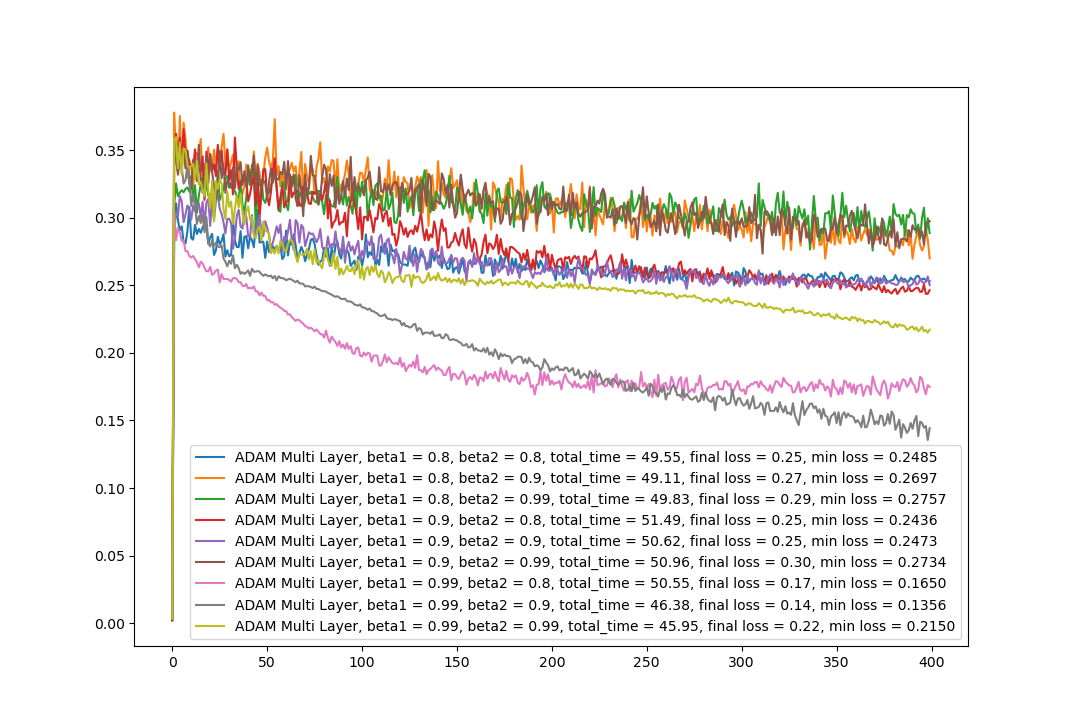

| Beta1 | Beta2 | Learning Rate | Training Iterations | Total Time (s) | Final Loss | Min Loss |
|-------|-------|--------------|----------------------|----------------|------------|------------|
| 0.8  | 0.8   | 1e-5         | 40000                | 49.55         | 0.25      |  0.25  |
| 0.8  | 0.9   | 1e-5         | 40000                | 49.11          | 0.27     |  0.27  |
| 0.8  | 0.99  | 1e-5         | 40000                | 49.83          | 0.29      |  0.27  |
| 0.9  | 0.8   | 1e-5         | 40000                | 51.49          | 0.25      |  0.24  |
| 0.9  | 0.9   | 1e-5         | 40000                | 50.62          | 0.25     |  0.24  |
| 0.9  | 0.99  | 1e-5         | 40000                | 50.96          | 0.3    |   0.27 |
| 0.99  | 0.8   | 1e-5         | 40000                | 50.55          | 0.17    |  0.16  |
| 0.99  | 0.9   | 1e-5         | 40000                | 46.38          | **0.14**     |  **0.13**  |
| 0.99  | 0.99  | 1e-5         | 40000                | 45.95          | 0.22     |  0.21  |

The table presents the effect of different Beta1 and Beta2 values in the ADAM optimizer on training performance for 40,000 iterations with a learning rate of 1e-5.

The total training time remains relatively consistent across all setups, indicating that the change in Beta1 and Beta2 does not significantly affect the overall computational cost for this number of iterations. This suggests that the hyperparameters influence convergence speed and loss behavior more than the time taken per iteration.

There is a clear trend showing that using higher Beta1 and Beta2 values results in lower final and minimum loss. For example, Beta1 = 0.99 and Beta2 = 0.9 yields the lowest final loss (0.14) and minimum loss (0.13). In contrast, Beta1 = 0.8 and Beta2 = 0.8 results in a higher final loss (0.25) despite similar training times.

The configuration with Beta1 = 0.99 and Beta2 = 0.9 stands out as the most effective, achieving lower loss values compared to other combinations of Beta1 and Beta2. The higher Beta1 helps to accelerate convergence by leveraging momentum to smooth updates, while Beta2 ensures that the second moment estimate adapts more reliably, leading to more stable parameter updates.

In conclusion, higher Beta1 and Beta2 values improve optimization by reducing final and minimum loss. The configuration of Beta1 = 0.99 and Beta2 = 0.9 provides the best performance, achieving the lowest final and minimum loss, suggesting that these hyperparameters lead to faster, more stable convergence in your model setup.

# SGD+ vs SGD
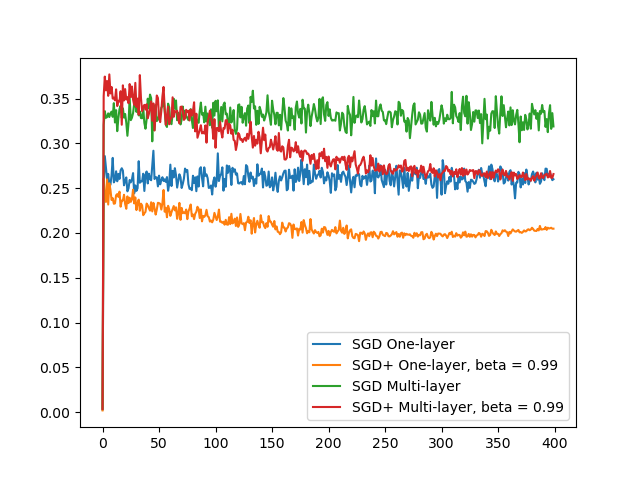
For learning rate = 1e-5, both multi-neuron models outperform the one-neuron model, indicating that increased model capacity improves learning efficiency. Additionally, both SGD+ variants outperform standard SGD, suggesting that momentum helps accelerate convergence and escape shallow local minima. Among them, the multi-neuron SGD+ model exhibits the most significant improvement, demonstrating the combined benefits of increased model complexity and momentum-based optimization. In contrast, both SGD models without momentum show relatively minimal improvement, highlighting the limitations of basic SGD in slow convergence scenarios.

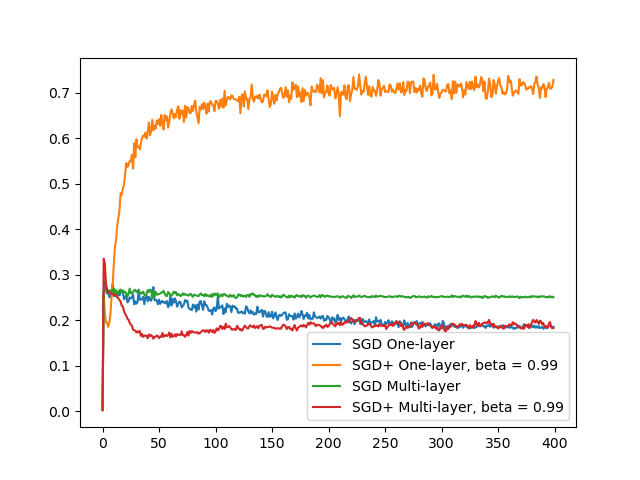
For learning rate = 1e-3, an interesting phenomenon occurs with SGD+ in the one-neuron model—it appears to overshoot the optimal point, causing the loss to increase after reaching a minimum. This suggests that the momentum term, combined with a higher learning rate, pushes the updates too aggressively, preventing convergence and leading to instability. In contrast, other models, particularly the multi-neuron models, maintain more stable behavior, likely benefiting from better gradient representations and robustness to step-size fluctuations. This highlights the importance of selecting an appropriate learning rate, especially when using momentum-based optimizers, to prevent divergence.


# ADAM vs SGD

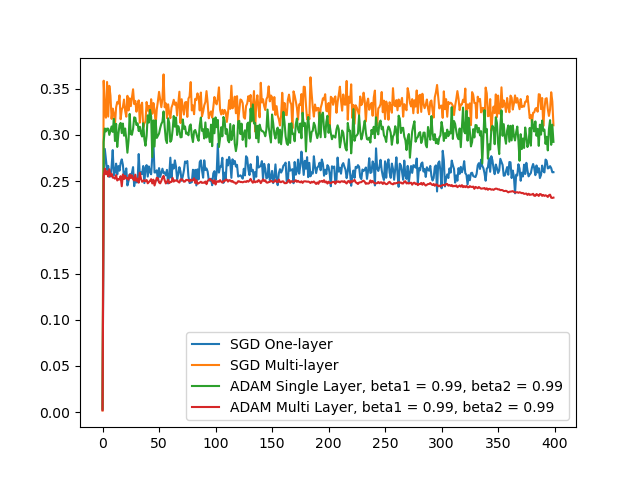

For lr = 1e-5, both ADAM models outperform SGD, with the multi-neuron ADAM showing the smoothest loss plot. This suggests that ADAM’s adaptive learning rate mechanism helps achieve more stable and efficient convergence, particularly in more complex models. The multi-neuron ADAM model benefits from the combination of model capacity and ADAM’s adjustments to learning rates, allowing it to reach lower loss values with a more controlled and gradual decrease in loss over time.

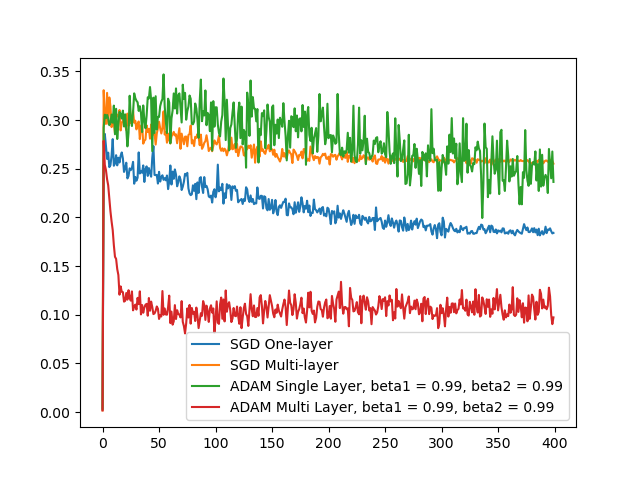
For lr = 1e-3, the loss plot fluctuates much more, primarily due to the larger step size. With a higher learning rate, the updates are more aggressive, leading to larger oscillations in the loss. Despite the fluctuations, both ADAM models  one-neuron and multi-neuron, still outperform the SGD models. This further emphasizes ADAM’s effectiveness in managing optimization even with larger step sizes. The loss fluctuations seen in the one-neuron ADAM model are likely due to the combined effects of the learning rate and the adaptive learning rate mechanism in ADAM, which adjusts the step size dynamically but still exhibits some instability with higher values.


# Extra Credit
### 1. Compare the performance of the two demo scripts (as measured by just the training loss vs. iterations plots) for the two cases of with and without the data normalization as currently used.

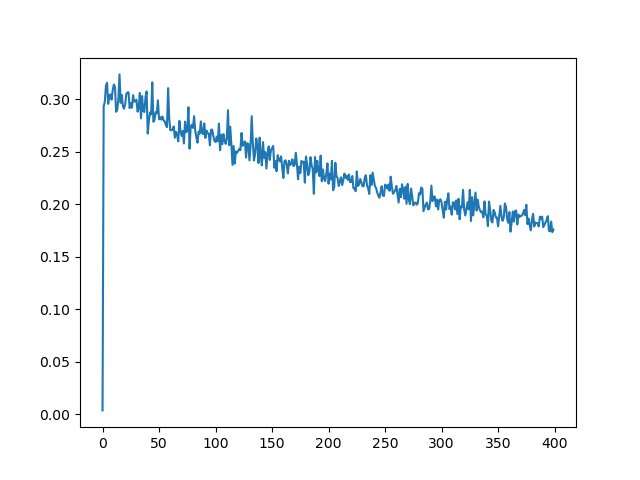

one_neuron_classifier.py with the data normalization as currently used.

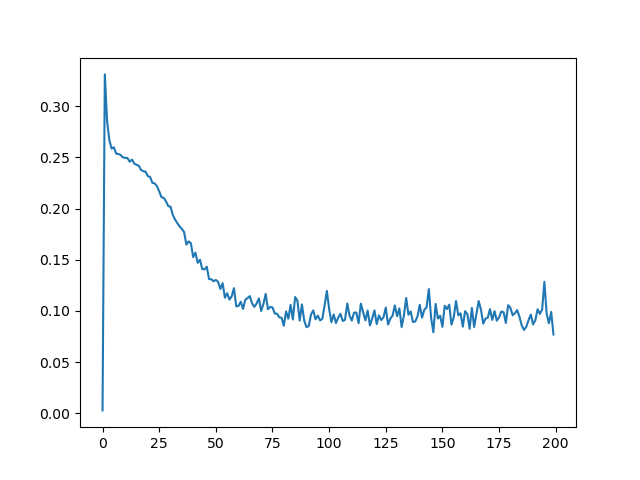

multi_neuron_classifier.py with the data normalization as currently used.


To remove the data normalization, here is the line we need to comment out:

In [ ]:
def getbatch(self):
    batch_data,batch_labels = [],[]                           
    # maxval = 0.0                                          <-this line                                  
    for _ in range(self.batch_size):
        item = self._getitem()
        # if np.max(item[0]) > maxval:                      <-this line
        #     maxval = np.max(item[0])                      <-this line
        batch_data.append(item[0])
        batch_labels.append(item[1])
    # batch_data = [item/maxval for item in batch_data]     <-this line
    batch = [batch_data, batch_labels]
    return batch   

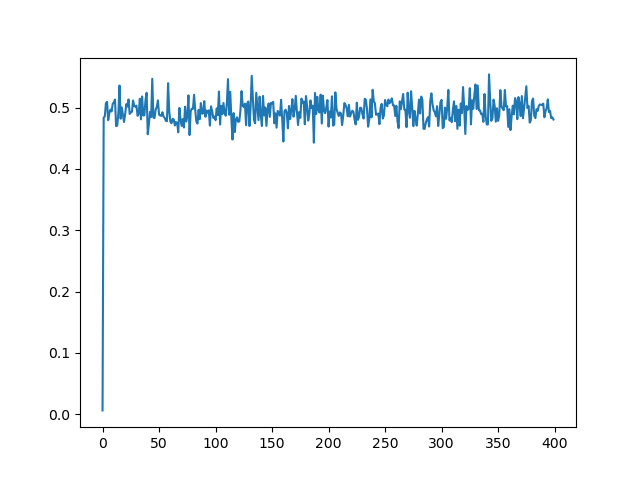
one_neuron_classifier.py without the data normalization as currently used.

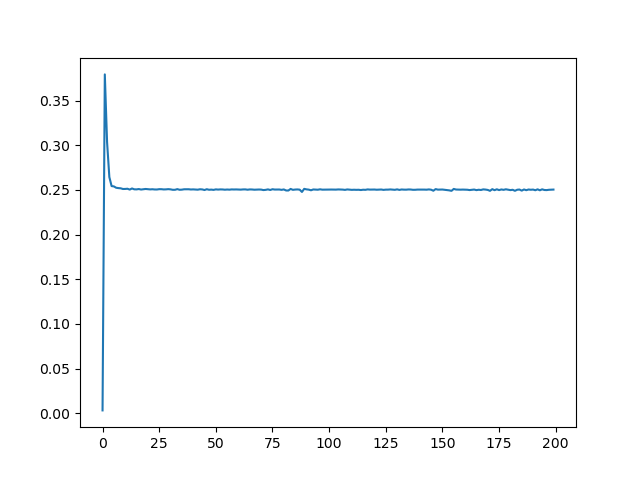

multi_neuron_classifier.py without the data normalization as currently used.

We can observe that, after removing that data normalization, we downgrade the performance. Furthermore, the loss function behaves like a horizontal line, maintaining a constant value. The reason is that without normalization, the input data is not scaled in a way that is conducive to effective training  although the normalization steps aren't perfect.

### 2. Truncate the input data and remap the data to the (−1.0,1.0)
The default approach attempts to normalize the batch data by dividing each sample by the maximum absolute value in the batch. However, this is not a meaningful or stable normalization method for the given problem setup. Because every maximum in every batch is different, this make the data inconsistent.


To Truncate the input data, we need to set the mean and std, inorder to calculate the interval (µ − 5σ,µ + 5σ).

In [ ]:
def __init__(self, training_data, batch_size):
    self.training_data = training_data
    self.batch_size = batch_size
    self.class_0_samples = [(item, 0) for item in self.training_data[0]]   ## Associate label 0 with each sample
    self.class_1_samples = [(item, 1) for item in self.training_data[1]]   ## Associate label 1 with each sample
    
    # Calculate statistics for normalization
    all_samples = np.vstack([self.training_data[0], self.training_data[1]])
    self.mean = np.mean(all_samples, axis=0)
    self.std = np.std(all_samples, axis=0)
    # add upper bond and lower bond
    self.upper = self.mean + 5*self.std
    self.lower = self.mean - 5*self.std
    # Add global min and max for stable scaling
    self.global_min = np.min(all_samples)
    self.global_max = np.max(all_samples)

First, I tried to remap the data to the (−1.0,1.0) interval by using normalization, x=2(x−meanx)/(maxx−minx)−1

In [ ]:
def truncate_and_rescale(self, sample):
    data, label = sample
    truncated = np.clip(data, self.lower, self.upper)
    # to [-1,1]
    normalized = 2 * ((truncated - self.mean) / (self.global_max - self.global_min)) - 1
    return normalized, label

def getbatch(self):
    batch_data,batch_labels = [],[]                            ## First list for samples, the second for labels
    # maxval = 0.0                                               ## For approximate batch data normalization
    for _ in range(self.batch_size):
        item = self._getitem()
        # if np.max(item[0]) > maxval: 
        #     maxval = np.max(item[0])
        normalized_data, label  = self.truncate_and_rescale(item)
        batch_data.append(normalized_data)
        batch_labels.append(label)
    # batch_data = [item/maxval for item in batch_data]          ## Normalize batch data
    batch = [batch_data, batch_labels]
    return batch  

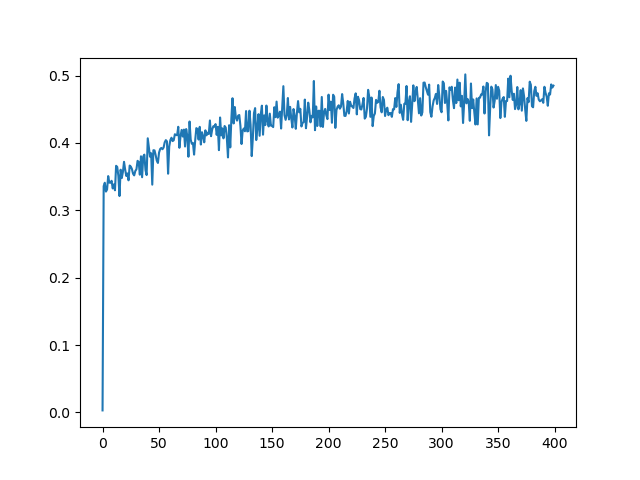
one_neuron_classifier.py with the data normalization I implement(Normalization).

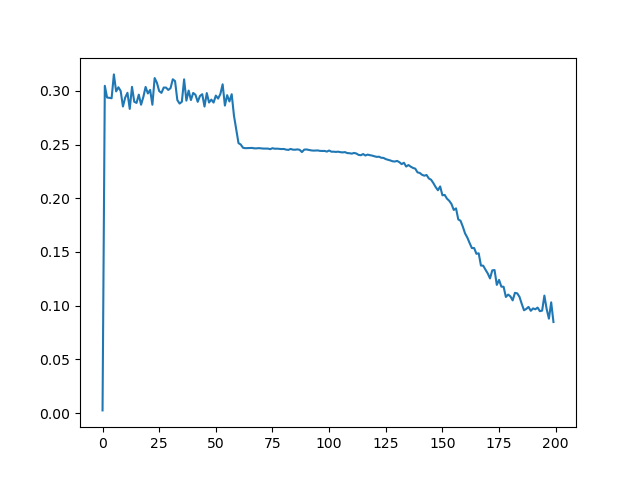
multi_neuron_classifier.py with the data normalization I implement(Normalization).

I also tried to use min max scaling, and make the data in [-1, 1] by using function
x=2(x−minx)/(maxx−minx)−1

In [ ]:
def truncate_and_rescale(self, sample):
    data, label = sample
    truncated = np.clip(data, self.lower, self.upper)
    # to [-1,1]
    normalized = 2 * ((truncated - self.global_min) / (self.global_max - self.global_min)) - 1
    return normalized, label

def getbatch(self):
    batch_data,batch_labels = [],[]                            ## First list for samples, the second for labels
    # maxval = 0.0                                               ## For approximate batch data normalization
    for _ in range(self.batch_size):
        item = self._getitem()
        # if np.max(item[0]) > maxval: 
        #     maxval = np.max(item[0])
        normalized_data, label  = self.truncate_and_rescale(item)
        batch_data.append(normalized_data)
        batch_labels.append(label)
    # batch_data = [item/maxval for item in batch_data]          ## Normalize batch data
    batch = [batch_data, batch_labels]
    return batch 

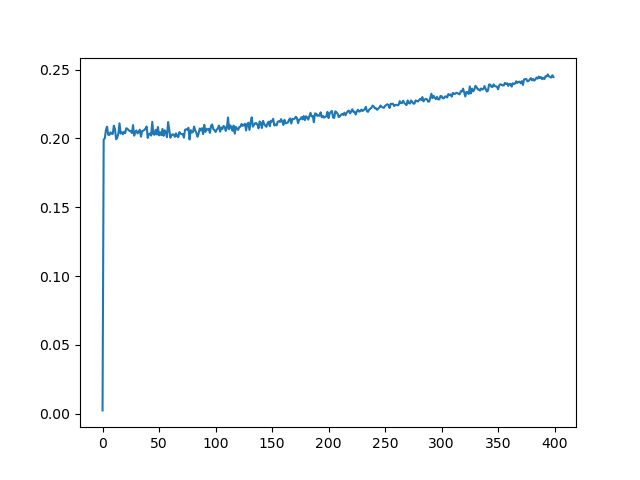
one_neuron_classifier.py with the data normalization I implement(min max scaling).

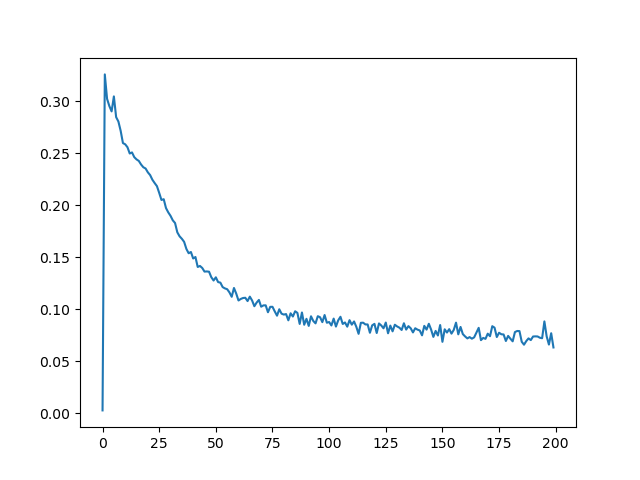
multi_neuron_classifier.py with the data normalization I implement(min max scaling).

### Conclusion for Extra Credit Part
The default method provided by the file performs better than using no normalization or scaling, but both min-max scaling and normalization surpass the default method in terms of performance. Among the two, min-max scaling outperforms all other methods, achieving the best results with a fine margin. Additionally, it offers a more stable training process, which is particularly beneficial in terms of convergence and reducing fluctuations in the loss. This suggests that min-max scaling helps the model train more efficiently and reach a lower final loss compared to other approaches.

# Source Code For HW

In [ ]:
# most of the code is borrowed from the parent class, but we need to add some new features, new feature is labeled with comments

# my work
class SGD_ComputationalGraphPrimer(ComputationalGraphPrimer):
    def __init__(self, *args, **kwargs):
        # initialize the parent class
        super().__init__(*args, **kwargs)

    def run_training_loop_one_neuron_model(self, training_data):
        self.vals_for_learnable_params = {param: random.uniform(0,1) for param in self.learnable_params}
        self.bias = random.uniform(0,1)                                                     ## Adding the bias improves class discrimination.
                                                                                            ##   We initialize it to a random number.
        class DataLoader:
            def __init__(self, training_data, batch_size):
                self.training_data = training_data
                self.batch_size = batch_size
                self.class_0_samples = [(item, 0) for item in self.training_data[0]]   ## Associate label 0 with each sample
                self.class_1_samples = [(item, 1) for item in self.training_data[1]]   ## Associate label 1 with each sample

            def __len__(self):
                return len(self.training_data[0]) + len(self.training_data[1])

            def _getitem(self):    
                cointoss = random.choice([0,1])                            ## When a batch is created by getbatch(), we want the
                                                                           ##   samples to be chosen randomly from the two lists
                if cointoss == 0:
                    return random.choice(self.class_0_samples)
                else:
                    return random.choice(self.class_1_samples)            

            def getbatch(self):
                batch_data,batch_labels = [],[]                            ## First list for samples, the second for labels
                maxval = 0.0                                               ## For approximate batch data normalization
                for _ in range(self.batch_size):
                    item = self._getitem()
                    if np.max(item[0]) > maxval: 
                        maxval = np.max(item[0])
                    batch_data.append(item[0])
                    batch_labels.append(item[1])
                batch_data = [item/maxval for item in batch_data]          ## Normalize batch data
                batch = [batch_data, batch_labels]
                return batch                


        data_loader = DataLoader(training_data, batch_size=self.batch_size)
        loss_running_record = []
        i = 0
        avg_loss_over_iterations = 0.0                                    ##  Average the loss over iterations for printing out 
                                                                           ##    every N iterations during the training loop.
        for i in range(self.training_iterations):
            data = data_loader.getbatch()
            data_tuples_in_batch = data[0]
            class_labels_in_batch = data[1]
            y_preds, deriv_sigmoids =  self.forward_prop_one_neuron_model(data_tuples_in_batch)     ##  FORWARD PROP of data. Derivatives of Sigmoid saved for backprop
            loss = sum([(abs(class_labels_in_batch[i] - y_preds[i]))**2 for i in range(len(class_labels_in_batch))])  ##  Find loss
            avg_loss_over_iterations += loss / float(len(class_labels_in_batch))
            if i%(self.display_loss_how_often) == 0: 
                avg_loss_over_iterations /= self.display_loss_how_often
                loss_running_record.append(avg_loss_over_iterations)
                print("[iter=%d]  loss = %.4f" %  (i+1, avg_loss_over_iterations))                 ## Display average loss
                avg_loss_over_iterations = 0.0                                                     ## Re-initialize avg loss
            y_errors_in_batch = list(map(operator.sub, class_labels_in_batch, y_preds))
            self.backprop_and_update_params_one_neuron_model(data_tuples_in_batch, y_preds, y_errors_in_batch, deriv_sigmoids)  ## BACKPROP loss
        # plt.figure()     
        # plt.plot(loss_running_record) 
        # plt.show()  
        return loss_running_record 
    
    def run_training_loop_multi_neuron_model(self, training_data):

        class DataLoader:
            def __init__(self, training_data, batch_size):
                self.training_data = training_data
                self.batch_size = batch_size
                self.class_0_samples = [(item, 0) for item in self.training_data[0]]    ## Associate label 0 with each sample
                self.class_1_samples = [(item, 1) for item in self.training_data[1]]    ## Associate label 1 with each sample

            def __len__(self):
                return len(self.training_data[0]) + len(self.training_data[1])

            def _getitem(self):    
                cointoss = random.choice([0,1])                            ## When a batch is created by getbatch(), we want the
                                                                           ##   samples to be chosen randomly from the two lists
                if cointoss == 0:
                    return random.choice(self.class_0_samples)
                else:
                    return random.choice(self.class_1_samples)            

            def getbatch(self):
                batch_data,batch_labels = [],[]                            ## First list for samples, the second for labels
                maxval = 0.0                                               ## For approximate batch data normalization
                for _ in range(self.batch_size):
                    item = self._getitem()
                    if np.max(item[0]) > maxval: 
                        maxval = np.max(item[0])
                    batch_data.append(item[0])
                    batch_labels.append(item[1])
                batch_data = [item/maxval for item in batch_data]          ## Normalize batch data       
                batch = [batch_data, batch_labels]
                return batch                

        ##  The training loop must first initialize the learnable parameters.  Remember, these are the 
        ##  symbolic names in your input expressions for the neural layer that do not begin with the 
        ##  letter 'x'.  In this case, we are initializing with random numbers from a uniform distribution 
        ##  over the interval (0,1):
        self.vals_for_learnable_params = {param: random.uniform(0,1) for param in self.learnable_params}
        ##  In the same  manner, we must also initialize the biases at each node that aggregates forward
        ##  propagating data:
        self.bias =   {i : [random.uniform(0,1) for j in range( self.layers_config[i] ) ]  for i in range(1, self.num_layers)}
        data_loader = DataLoader(training_data, batch_size=self.batch_size)
        loss_running_record = []
        i = 0
        avg_loss_over_iterations = 0.0                                          ##  Average the loss over iterations for printing out 
                                                                                ##    every N iterations during the training loop.   
        for i in range(self.training_iterations):
            data = data_loader.getbatch()
            data_tuples = data[0]
            class_labels = data[1]
            self.forward_prop_multi_neuron_model(data_tuples)                                       ## FORW PROP works by side-effect 
            predicted_labels_for_batch = self.forw_prop_vals_at_layers[self.num_layers-1]           ## Predictions from FORW PROP
            y_preds =  [item for sublist in  predicted_labels_for_batch  for item in sublist]       ## Get numeric vals for predictions
            loss = sum([(abs(class_labels[i] - y_preds[i]))**2 for i in range(len(class_labels))])  ## Calculate loss for batch
            loss_avg = loss / float(len(class_labels))                                              ## Average the loss over batch
            avg_loss_over_iterations += loss_avg                                                    ## Add to Average loss over iterations
            if i%(self.display_loss_how_often) == 0: 
                avg_loss_over_iterations /= self.display_loss_how_often
                loss_running_record.append(avg_loss_over_iterations)
                print("[iter=%d]  loss = %.4f" %  (i+1, avg_loss_over_iterations))                  ## Display avg loss
                avg_loss_over_iterations = 0.0                                                      ## Re-initialize avg-over-iterations loss
            y_errors_in_batch = list(map(operator.sub, class_labels, y_preds))
            self.backprop_and_update_params_multi_neuron_model(y_preds, y_errors_in_batch)
        # plt.figure()     
        # plt.plot(loss_running_record) 
        # plt.show()   
        return loss_running_record

class SGDPlus_ComputationalGraphPrimer(ComputationalGraphPrimer):
    def __init__(self, beta,*args, **kwargs):
        # initialize the parent class
        super().__init__(*args, **kwargs)

        # initialize the SGD+ parameters
        self.beta = beta
 
        

    def run_training_loop_one_neuron_model(self, training_data):
        self.vals_for_learnable_params = {param: random.uniform(0,1) for param in self.learnable_params}

        self.bias = random.uniform(0,1)                   

                                      
        # we need to remember values of learnable parameters and bias, 
        # ensuring that the accumulated velocity is carried over from previous updates.
        self.velocity4params = {param: 0.0 for param in self.learnable_params}
        self.velocity4bias = 0.0
    
        class DataLoader:
            def __init__(self, training_data, batch_size):
                self.training_data = training_data
                self.batch_size = batch_size
                self.class_0_samples = [(item, 0) for item in self.training_data[0]]  
                self.class_1_samples = [(item, 1) for item in self.training_data[1]]   

            def __len__(self):
                return len(self.training_data[0]) + len(self.training_data[1])

            def _getitem(self):    
                cointoss = random.choice([0,1])                           
                                                                          
                if cointoss == 0:
                    return random.choice(self.class_0_samples)
                else:
                    return random.choice(self.class_1_samples)            

            def getbatch(self):
                batch_data,batch_labels = [],[]                          
                maxval = 0.0                                            
                for _ in range(self.batch_size):
                    item = self._getitem()
                    if np.max(item[0]) > maxval: 
                        maxval = np.max(item[0])
                    batch_data.append(item[0])
                    batch_labels.append(item[1])
                batch_data = [item/maxval for item in batch_data]          ## Normalize batch data
                batch = [batch_data, batch_labels]
                return batch                

        data_loader = DataLoader(training_data, batch_size=self.batch_size)
        loss_running_record = []
        i = 0
        avg_loss_over_iterations = 0.0                                    

        for i in range(self.training_iterations):
            data = data_loader.getbatch()
            data_tuples_in_batch = data[0]
            class_labels_in_batch = data[1]
            y_preds, deriv_sigmoids =  self.forward_prop_one_neuron_model(data_tuples_in_batch)    
            loss = sum([(abs(class_labels_in_batch[i] - y_preds[i]))**2 for i in range(len(class_labels_in_batch))]) 
            avg_loss_over_iterations += loss / float(len(class_labels_in_batch))
            if i%(self.display_loss_how_often) == 0: 
                avg_loss_over_iterations /= self.display_loss_how_often
                loss_running_record.append(avg_loss_over_iterations)
                print("[iter=%d]  loss = %.4f" %  (i+1, avg_loss_over_iterations))                 
                avg_loss_over_iterations = 0.0                                                   
            y_errors_in_batch = list(map(operator.sub, class_labels_in_batch, y_preds))
            self.backprop_and_update_params_one_neuron_model(data_tuples_in_batch, y_preds, y_errors_in_batch, deriv_sigmoids)  
        
        # return lost list for future plotting, and remove code for plotting (borrow from the upper(Prof Kak's) code)
        return loss_running_record
    
    def backprop_and_update_params_one_neuron_model(self, data_tuples_in_batch, predictions, y_errors_in_batch, deriv_sigmoids):

        input_vars = self.independent_vars

        input_vars_to_param_map = self.var_to_var_param[self.output_vars[0]]                  ## These two statements align the
        param_to_vars_map = {param : var for var, param in input_vars_to_param_map.items()}   ##   the input vars 
        vals_for_learnable_params = self.vals_for_learnable_params
        for i,param in enumerate(self.vals_for_learnable_params):
            partial_of_loss_wrt_param = 0.0
            for j in range(self.batch_size):
                vals_for_input_vars_dict =  dict(zip(input_vars, list(data_tuples_in_batch[j])))
                partial_of_loss_wrt_param   +=   -  y_errors_in_batch[j] * vals_for_input_vars_dict[param_to_vars_map[param]] * deriv_sigmoids[j]
            partial_of_loss_wrt_param /=  float(self.batch_size)

            # # before:
            # step = self.learning_rate * partial_of_loss_wrt_param 
            # # Update the learnable parameters
            # self.vals_for_learnable_params[param] += step

            # add momentum for learnable parameters
            # vt+1 = βvt +gt
            # wt+1 = wt −ηvt+1
            self.velocity4params[param] = self.beta * self.velocity4params[param] + partial_of_loss_wrt_param # vt+1 = βvt +gt
            step = self.learning_rate * self.velocity4params[param] # ηvt+1
            self.vals_for_learnable_params[param] += step # wt+1 = wt −ηvt+1 (why not -=?)


        y_error_avg = sum(y_errors_in_batch) / float(self.batch_size)
        deriv_sigmoid_avg = sum(deriv_sigmoids) / float(self.batch_size)

        # before:
        # self.bias += self.learning_rate * y_error_avg * deriv_sigmoid_avg    ## Update the bias

        # add momentum for bias
        # vb t+1 = βvb t +gb t
        # bt+1 = bt −ηvb t+1
        self.velocity4bias = self.beta * self.velocity4bias + y_error_avg * deriv_sigmoid_avg # vb t+1 = βvb t +gb t
        step = self.learning_rate * self.velocity4bias # ηvb t+1
        self.bias += step # bt+1 = bt −ηvb t+1

# return lost list for future plotting, and remove code for plotting (borrow from the upper(Prof Kak's) code)
    def run_training_loop_multi_neuron_model(self, training_data):
        class DataLoader:
            def __init__(self, training_data, batch_size):
                self.training_data = training_data
                self.batch_size = batch_size
                self.class_0_samples = [(item, 0) for item in self.training_data[0]]    ## Associate label 0 with each sample
                self.class_1_samples = [(item, 1) for item in self.training_data[1]]    ## Associate label 1 with each sample

            def __len__(self):
                return len(self.training_data[0]) + len(self.training_data[1])

            def _getitem(self):    
                cointoss = random.choice([0,1])                            ## When a batch is created by getbatch(), we want the
                                                                           ##   samples to be chosen randomly from the two lists
                if cointoss == 0:
                    return random.choice(self.class_0_samples)
                else:
                    return random.choice(self.class_1_samples)            

            def getbatch(self):
                batch_data,batch_labels = [],[]                            ## First list for samples, the second for labels
                maxval = 0.0                                               ## For approximate batch data normalization
                for _ in range(self.batch_size):
                    item = self._getitem()
                    if np.max(item[0]) > maxval: 
                        maxval = np.max(item[0])
                    batch_data.append(item[0])
                    batch_labels.append(item[1])
                batch_data = [item/maxval for item in batch_data]          ## Normalize batch data       
                batch = [batch_data, batch_labels]
                return batch                

        self.vals_for_learnable_params = {param: random.uniform(0,1) for param in self.learnable_params}
        self.bias =   {i : [random.uniform(0,1) for j in range( self.layers_config[i] ) ]  for i in range(1, self.num_layers)}
        
        # we need to remember values of learnable parameters and bias, 
        # ensuring that the accumulated velocity is carried over from previous updates.
        self.velocity4params = {param: 0.0 for param in self.learnable_params}
        self.velocity4bias = {i : [0.0 for j in range( self.layers_config[i] ) ]  for i in range(1, self.num_layers)}
        
        
        data_loader = DataLoader(training_data, batch_size=self.batch_size)
        loss_running_record = []
        i = 0
        avg_loss_over_iterations = 0.0                                          ##  Average the loss over iterations for printing out 
                                                                                ##    every N iterations during the training loop.   
        for i in range(self.training_iterations):
            data = data_loader.getbatch()
            data_tuples = data[0]
            class_labels = data[1]
            self.forward_prop_multi_neuron_model(data_tuples)                                       ## FORW PROP works by side-effect 
            predicted_labels_for_batch = self.forw_prop_vals_at_layers[self.num_layers-1]           ## Predictions from FORW PROP
            y_preds =  [item for sublist in  predicted_labels_for_batch  for item in sublist]       ## Get numeric vals for predictions
            loss = sum([(abs(class_labels[i] - y_preds[i]))**2 for i in range(len(class_labels))])  ## Calculate loss for batch
            loss_avg = loss / float(len(class_labels))                                              ## Average the loss over batch
            avg_loss_over_iterations += loss_avg                                                    ## Add to Average loss over iterations
            if i%(self.display_loss_how_often) == 0: 
                avg_loss_over_iterations /= self.display_loss_how_often
                loss_running_record.append(avg_loss_over_iterations)
                print("[iter=%d]  loss = %.4f" %  (i+1, avg_loss_over_iterations))                  ## Display avg loss
                avg_loss_over_iterations = 0.0                                                      ## Re-initialize avg-over-iterations loss
            y_errors_in_batch = list(map(operator.sub, class_labels, y_preds))
            self.backprop_and_update_params_multi_neuron_model(y_preds, y_errors_in_batch)
        
        # return lost list for future plotting, and remove code for plotting (borrow from the upper(Prof Kak's) code)
        return loss_running_record 


    def backprop_and_update_params_multi_neuron_model(self, predictions, y_errors):
        pred_err_backproped_at_layers =   [ {i : [None for j in range( self.layers_config[i] ) ]  
                                                                  for i in range(self.num_layers)} for _ in range(self.batch_size) ]
        partial_of_loss_wrt_params = {param : 0.0 for param in self.all_params}
        bias_changes =   {i : [0.0 for j in range( self.layers_config[i] ) ]  for i in range(1, self.num_layers)}
        

        for b in range(self.batch_size):
            pred_err_backproped_at_layers[b][self.num_layers - 1] = [ y_errors[b] ]
            for back_layer_index in reversed(range(1,self.num_layers)):             ## For the 3-layer network, the first val for back_layer_index is 2 for the 3rd layer
                input_vals = self.forw_prop_vals_at_layers[back_layer_index -1]     ## This is a list of 8 two-element lists  --- since we have two nodes in the 2nd layer
                deriv_sigmoids =  self.gradient_vals_for_layers[back_layer_index]   ## This is a list eight one-element lists, one for each batch element
                vars_in_layer  =  self.layer_vars[back_layer_index]                 ## A list like ['xo']
                vars_in_next_layer_back  =  self.layer_vars[back_layer_index - 1]   ## A list like ['xw', 'xz']
                vals_for_input_vars_dict =  dict(zip(vars_in_next_layer_back, self.forw_prop_vals_at_layers[back_layer_index - 1][b]))   
                layer_params = self.layer_params[back_layer_index]         
                transposed_layer_params = list(zip(*layer_params))                  ## Creating a transpose of the link matrix, See Eq. 30 on Slide 77
                for k,var1 in enumerate(vars_in_next_layer_back):
                    for j,var2 in enumerate(vars_in_layer):
                        pred_err_backproped_at_layers[b][back_layer_index - 1][k] = sum([self.vals_for_learnable_params[transposed_layer_params[k][i]]
                                                                                       * pred_err_backproped_at_layers[b][back_layer_index][i]
                                                                                                                  for i in range(len(vars_in_layer))])
                for j,var in enumerate(vars_in_layer):
                    layer_params = self.layer_params[back_layer_index][j]           ##  ['cp', 'cq']   for the end layer
                    input_vars_to_param_map = self.var_to_var_param[var]            ## These two statements align the    {'xw': 'cp', 'xz': 'cq'}
                    param_to_vars_map = {param : var for var, param in input_vars_to_param_map.items()}   ##   and the input vars   {'cp': 'xw', 'cq': 'xz'}

                    ##  Update the partials of Loss wrt to the learnable parameters between the current layer
                    ##  and the previous layer. You are accumulating these partials over the different training
                    ##  data samples in the batch being processed.  For each training data sample, the formula
                    ##  being used is shown in Eq. (29) on Slide 77 of my Week 3 slides:
                    for i,param in enumerate(layer_params):
                        partial_of_loss_wrt_params[param]   +=   pred_err_backproped_at_layers[b][back_layer_index][j] * \
                                                                        vals_for_input_vars_dict[param_to_vars_map[param]] * deriv_sigmoids[b][j]
                ##  We will now estimate the change in the bias that needs to be made at each node in the previous layer
                ##  from the derivatives the sigmoid at the nodes in the current layer and the prediction error as
                ##  backproped to the previous layer nodes:
                for k,var1 in enumerate(vars_in_next_layer_back):
                    for j,var2 in enumerate(vars_in_layer):
                        if back_layer_index-1 > 0:
                            bias_changes[back_layer_index-1][k] = pred_err_backproped_at_layers[b][back_layer_index - 1][k] * deriv_sigmoids[b][j] 
 

        # Before:
        # ## Now update the learnable parameters.  The loop shown below carries out SGD mandated averaging
        # for param in partial_of_loss_wrt_params: 
        #     partial_of_loss_wrt_param = partial_of_loss_wrt_params[param] /  float(self.batch_size)   
        #     step = self.learning_rate * partial_of_loss_wrt_param 
        #     self.vals_for_learnable_params[param] += step

        # ##  Finally we update the biases at all the nodes that aggregate data:      
        # for layer_index in range(1,self.num_layers):           
        #     for k in range(self.layers_config[layer_index]):
        #         self.bias[layer_index][k]  +=  self.learning_rate * ( bias_changes[layer_index][k] / float(self.batch_size) )


        # add momentum for learnable parameters
        # vt+1 = βvt +gt
        # wt+1 = wt −ηvt+1
        for param in partial_of_loss_wrt_params: 
            partial_of_loss_wrt_param = partial_of_loss_wrt_params[param] /  float(self.batch_size)   
            self.velocity4params[param] = self.beta * self.velocity4params[param] + partial_of_loss_wrt_param # vt+1 = βvt +gt
            step = self.learning_rate * self.velocity4params[param] # ηvt+1
            self.vals_for_learnable_params[param] += step # wt+1 = wt −ηvt+1
        for layer_index in range(1,self.num_layers):           
            for k in range(self.layers_config[layer_index]):
                self.velocity4bias[layer_index][k] = self.beta * self.velocity4bias[layer_index][k] + bias_changes[layer_index][k] / float(self.batch_size)
                step = self.learning_rate * self.velocity4bias[layer_index][k]
                self.bias[layer_index][k] += step

class Adam_ComputationalGraphPrimer(ComputationalGraphPrimer):
# mt+1 = β1 * mt + (1 - β1) * gradt
# This computes the first moment estimate (moving average of gradients)

# vt+1 = β2 * vt + (1 - β2) * (gradt)^2
# This computes the second moment estimate (moving average of squared gradients)

# ˆmt+1 = mt+1 / (1 - β1^t)
# Bias correction for the first moment estimate

# ˆvt+1 = vt+1 / (1 - β2^t)
# Bias correction for the second moment estimate

# pt+1 = pt - lr * (ˆmt+1 / (sqrt(ˆvt+1 + ϵ)))
# Parameter update using the corrected first and second moments
    def __init__(self, beta1,beta2,*args, **kwargs):
        # initialize the parent class
        super().__init__(*args, **kwargs)

        # initialize the ADAM parameters
        self.beta1 = beta1
        self.beta2 = beta2
        
        self.epsilon = 1e-8 # default value in many implementations (e.g., TensorFlow, PyTorch
        self.t = 0 # initialize timestep
        

    def run_training_loop_one_neuron_model(self, training_data):
        self.vals_for_learnable_params = {param: random.uniform(0,1) for param in self.learnable_params}

        self.bias = random.uniform(0,1)                   

                                      
        # we need to remember values of learnable parameters and bias, 
        # ensuring that the accumulated velocity is carried over from previous updates.
        self.velocity4params = {param: 0.0 for param in self.learnable_params}
        self.velocity4bias = 0.0
        # we also need to remember mt of learnable parameters and bias, 
        self.moment4params = {param: 0.0 for param in self.learnable_params}
        self.moment4bias = 0.0
        # initialize timestep
        self.t = 1 


        class DataLoader:
            def __init__(self, training_data, batch_size):
                self.training_data = training_data
                self.batch_size = batch_size
                self.class_0_samples = [(item, 0) for item in self.training_data[0]]  
                self.class_1_samples = [(item, 1) for item in self.training_data[1]]   

            def __len__(self):
                return len(self.training_data[0]) + len(self.training_data[1])

            def _getitem(self):    
                cointoss = random.choice([0,1])                           
                                                                          
                if cointoss == 0:
                    return random.choice(self.class_0_samples)
                else:
                    return random.choice(self.class_1_samples)            

            def getbatch(self):
                batch_data,batch_labels = [],[]                          
                maxval = 0.0                                            
                for _ in range(self.batch_size):
                    item = self._getitem()
                    if np.max(item[0]) > maxval: 
                        maxval = np.max(item[0])
                    batch_data.append(item[0])
                    batch_labels.append(item[1])
                batch_data = [item/maxval for item in batch_data]          ## Normalize batch data
                batch = [batch_data, batch_labels]
                return batch                

        data_loader = DataLoader(training_data, batch_size=self.batch_size)
        loss_running_record = []
        i = 0
        avg_loss_over_iterations = 0.0                                    

        for i in range(self.training_iterations):
            data = data_loader.getbatch()
            data_tuples_in_batch = data[0]
            class_labels_in_batch = data[1]
            y_preds, deriv_sigmoids =  self.forward_prop_one_neuron_model(data_tuples_in_batch)    
            loss = sum([(abs(class_labels_in_batch[i] - y_preds[i]))**2 for i in range(len(class_labels_in_batch))]) 
            avg_loss_over_iterations += loss / float(len(class_labels_in_batch))
            if i%(self.display_loss_how_often) == 0: 
                avg_loss_over_iterations /= self.display_loss_how_often
                loss_running_record.append(avg_loss_over_iterations)
                print("[iter=%d]  loss = %.4f" %  (i+1, avg_loss_over_iterations))                 
                avg_loss_over_iterations = 0.0                                                   
            y_errors_in_batch = list(map(operator.sub, class_labels_in_batch, y_preds))
            self.backprop_and_update_params_one_neuron_model(data_tuples_in_batch, y_preds, y_errors_in_batch, deriv_sigmoids)  
        
            # increment timestep
            self.t += 1 
        # return lost list for future plotting, and remove code for plotting (borrow from the upper(Prof Kak's) code)
        return loss_running_record
    
    def backprop_and_update_params_one_neuron_model(self, data_tuples_in_batch, predictions, y_errors_in_batch, deriv_sigmoids):
        input_vars = self.independent_vars

        input_vars_to_param_map = self.var_to_var_param[self.output_vars[0]]                  ## These two statements align the
        param_to_vars_map = {param : var for var, param in input_vars_to_param_map.items()}   ##   the input vars 
        vals_for_learnable_params = self.vals_for_learnable_params
        for i,param in enumerate(self.vals_for_learnable_params):
            partial_of_loss_wrt_param = 0.0
            for j in range(self.batch_size):
                vals_for_input_vars_dict =  dict(zip(input_vars, list(data_tuples_in_batch[j])))
                partial_of_loss_wrt_param   +=   -  y_errors_in_batch[j] * vals_for_input_vars_dict[param_to_vars_map[param]] * deriv_sigmoids[j]
            partial_of_loss_wrt_param /=  float(self.batch_size)

            # # before:
            # step = self.learning_rate * partial_of_loss_wrt_param 
            # # Update the learnable parameters
            # self.vals_for_learnable_params[param] += step

            # mt+1 = β1 * mt + (1 - β1) * gradt
            # vt+1 = β2 * vt + (1 - β2) * (gradt)^2
            # ˆmt+1 = mt+1 / (1 - β1^t)
            # ˆvt+1 = vt+1 / (1 - β2^t)
            # pt+1 = pt - lr * (ˆmt+1 / (sqrt(ˆvt+1 + ϵ)))
            self.moment4params[param] = self.beta1 * self.moment4params[param] + (1 - self.beta1)*partial_of_loss_wrt_param
            self.velocity4params[param] = self.beta2 * self.velocity4params[param] + (1 - self.beta2)*partial_of_loss_wrt_param**2
            moment_hat = self.moment4params[param] / (1 - self.beta1**(self.t))
            velocity_hat = self.velocity4params[param] / (1 - self.beta2**(self.t))
            step = self.learning_rate * moment_hat / (np.sqrt(velocity_hat + self.epsilon))
            self.vals_for_learnable_params[param] += step

        y_error_avg = sum(y_errors_in_batch) / float(self.batch_size)
        deriv_sigmoid_avg = sum(deriv_sigmoids) / float(self.batch_size)

        # before:
        # self.bias += self.learning_rate * y_error_avg * deriv_sigmoid_avg    ## Update the bias

        # mt+1 = β1 * mt + (1 - β1) * gradt
        # vt+1 = β2 * vt + (1 - β2) * (gradt)^2
        # ˆmt+1 = mt+1 / (1 - β1^t)
        # ˆvt+1 = vt+1 / (1 - β2^t)
        # pt+1 = pt - lr * (ˆmt+1 / (sqrt(ˆvt+1 + ϵ)))
        self.moment4bias = self.beta1 * self.moment4bias + (1 - self.beta1)*y_error_avg
        self.velocity4bias = self.beta2 * self.velocity4bias + (1 - self.beta2)*y_error_avg**2
        moment_hat = self.moment4bias / (1 - self.beta1**(self.t))
        velocity_hat = self.velocity4bias / (1 - self.beta2**(self.t))
        step = self.learning_rate * moment_hat / (np.sqrt(velocity_hat + self.epsilon))
        self.bias += step

        
# return lost list for future plotting, and remove code for plotting (borrow from the upper(Prof Kak's) code)
    def run_training_loop_multi_neuron_model(self, training_data):
        class DataLoader:
            def __init__(self, training_data, batch_size):
                self.training_data = training_data
                self.batch_size = batch_size
                self.class_0_samples = [(item, 0) for item in self.training_data[0]]    ## Associate label 0 with each sample
                self.class_1_samples = [(item, 1) for item in self.training_data[1]]    ## Associate label 1 with each sample

            def __len__(self):
                return len(self.training_data[0]) + len(self.training_data[1])

            def _getitem(self):    
                cointoss = random.choice([0,1])                            ## When a batch is created by getbatch(), we want the
                                                                           ##   samples to be chosen randomly from the two lists
                if cointoss == 0:
                    return random.choice(self.class_0_samples)
                else:
                    return random.choice(self.class_1_samples)            

            def getbatch(self):
                batch_data,batch_labels = [],[]                            ## First list for samples, the second for labels
                maxval = 0.0                                               ## For approximate batch data normalization
                for _ in range(self.batch_size):
                    item = self._getitem()
                    if np.max(item[0]) > maxval: 
                        maxval = np.max(item[0])
                    batch_data.append(item[0])
                    batch_labels.append(item[1])
                batch_data = [item/maxval for item in batch_data]          ## Normalize batch data       
                batch = [batch_data, batch_labels]
                return batch                

        self.vals_for_learnable_params = {param: random.uniform(0,1) for param in self.learnable_params}
        self.bias =   {i : [random.uniform(0,1) for j in range( self.layers_config[i] ) ]  for i in range(1, self.num_layers)}
        
        # we need to remember values of learnable parameters and bias, 
        # ensuring that the accumulated velocity is carried over from previous updates.
        self.velocity4params = {param: 0.0 for param in self.learnable_params}
        self.velocity4bias = {i : [0.0 for j in range( self.layers_config[i] ) ]  for i in range(1, self.num_layers)}
        # we also need to remember mt of learnable parameters and bias, 
        self.moment4params = {param: 0.0 for param in self.learnable_params}
        self.moment4bias = {i : [0.0 for j in range( self.layers_config[i] ) ]  for i in range(1, self.num_layers)}
        # initialize timestep
        self.t = 1 

        
        
        data_loader = DataLoader(training_data, batch_size=self.batch_size)
        loss_running_record = []
        i = 0
        avg_loss_over_iterations = 0.0                                          ##  Average the loss over iterations for printing out 
                                                                                ##    every N iterations during the training loop.   
        for i in range(self.training_iterations):
            data = data_loader.getbatch()
            data_tuples = data[0]
            class_labels = data[1]
            self.forward_prop_multi_neuron_model(data_tuples)                                       ## FORW PROP works by side-effect 
            predicted_labels_for_batch = self.forw_prop_vals_at_layers[self.num_layers-1]           ## Predictions from FORW PROP
            y_preds =  [item for sublist in  predicted_labels_for_batch  for item in sublist]       ## Get numeric vals for predictions
            loss = sum([(abs(class_labels[i] - y_preds[i]))**2 for i in range(len(class_labels))])  ## Calculate loss for batch
            loss_avg = loss / float(len(class_labels))                                              ## Average the loss over batch
            avg_loss_over_iterations += loss_avg                                                    ## Add to Average loss over iterations
            if i%(self.display_loss_how_often) == 0: 
                avg_loss_over_iterations /= self.display_loss_how_often
                loss_running_record.append(avg_loss_over_iterations)
                print("[iter=%d]  loss = %.4f" %  (i+1, avg_loss_over_iterations))                  ## Display avg loss
                avg_loss_over_iterations = 0.0                                                      ## Re-initialize avg-over-iterations loss
            y_errors_in_batch = list(map(operator.sub, class_labels, y_preds))
            self.backprop_and_update_params_multi_neuron_model(y_preds, y_errors_in_batch)
        
        # increment timestep
        self.t += 1 
        # return lost list for future plotting, and remove code for plotting (borrow from the upper(Prof Kak's) code)
        return loss_running_record 


    def backprop_and_update_params_multi_neuron_model(self, predictions, y_errors):
        pred_err_backproped_at_layers =   [ {i : [None for j in range( self.layers_config[i] ) ]  
                                                                  for i in range(self.num_layers)} for _ in range(self.batch_size) ]
        partial_of_loss_wrt_params = {param : 0.0 for param in self.all_params}
        bias_changes =   {i : [0.0 for j in range( self.layers_config[i] ) ]  for i in range(1, self.num_layers)}
        

        for b in range(self.batch_size):
            pred_err_backproped_at_layers[b][self.num_layers - 1] = [ y_errors[b] ]
            for back_layer_index in reversed(range(1,self.num_layers)):             ## For the 3-layer network, the first val for back_layer_index is 2 for the 3rd layer
                input_vals = self.forw_prop_vals_at_layers[back_layer_index -1]     ## This is a list of 8 two-element lists  --- since we have two nodes in the 2nd layer
                deriv_sigmoids =  self.gradient_vals_for_layers[back_layer_index]   ## This is a list eight one-element lists, one for each batch element
                vars_in_layer  =  self.layer_vars[back_layer_index]                 ## A list like ['xo']
                vars_in_next_layer_back  =  self.layer_vars[back_layer_index - 1]   ## A list like ['xw', 'xz']
                vals_for_input_vars_dict =  dict(zip(vars_in_next_layer_back, self.forw_prop_vals_at_layers[back_layer_index - 1][b]))   
                layer_params = self.layer_params[back_layer_index]         
                transposed_layer_params = list(zip(*layer_params))                  ## Creating a transpose of the link matrix, See Eq. 30 on Slide 77
                for k,var1 in enumerate(vars_in_next_layer_back):
                    for j,var2 in enumerate(vars_in_layer):
                        pred_err_backproped_at_layers[b][back_layer_index - 1][k] = sum([self.vals_for_learnable_params[transposed_layer_params[k][i]]
                                                                                       * pred_err_backproped_at_layers[b][back_layer_index][i]
                                                                                                                  for i in range(len(vars_in_layer))])
                for j,var in enumerate(vars_in_layer):
                    layer_params = self.layer_params[back_layer_index][j]           ##  ['cp', 'cq']   for the end layer
                    input_vars_to_param_map = self.var_to_var_param[var]            ## These two statements align the    {'xw': 'cp', 'xz': 'cq'}
                    param_to_vars_map = {param : var for var, param in input_vars_to_param_map.items()}   ##   and the input vars   {'cp': 'xw', 'cq': 'xz'}

                    for i,param in enumerate(layer_params):
                        partial_of_loss_wrt_params[param]   +=   pred_err_backproped_at_layers[b][back_layer_index][j] * \
                                                                        vals_for_input_vars_dict[param_to_vars_map[param]] * deriv_sigmoids[b][j]
                for k,var1 in enumerate(vars_in_next_layer_back):
                    for j,var2 in enumerate(vars_in_layer):
                        if back_layer_index-1 > 0:
                            bias_changes[back_layer_index-1][k] = pred_err_backproped_at_layers[b][back_layer_index - 1][k] * deriv_sigmoids[b][j] 
 

        # Before:
        # ## Now update the learnable parameters.  The loop shown below carries out SGD mandated averaging
        # for param in partial_of_loss_wrt_params: 
        #     partial_of_loss_wrt_param = partial_of_loss_wrt_params[param] /  float(self.batch_size)   
        #     step = self.learning_rate * partial_of_loss_wrt_param 
        #     self.vals_for_learnable_params[param] += step

        # ##  Finally we update the biases at all the nodes that aggregate data:      
        # for layer_index in range(1,self.num_layers):           
        #     for k in range(self.layers_config[layer_index]):
        #         self.bias[layer_index][k]  +=  self.learning_rate * ( bias_changes[layer_index][k] / float(self.batch_size) )


        # mt+1 = β1 * mt + (1 - β1) * gradt
        # vt+1 = β2 * vt + (1 - β2) * (gradt)^2
        # ˆmt+1 = mt+1 / (1 - β1^t)
        # ˆvt+1 = vt+1 / (1 - β2^t)
        # pt+1 = pt - lr * (ˆmt+1 / (sqrt(ˆvt+1 + ϵ)))
        for param in partial_of_loss_wrt_params: 
            partial_of_loss_wrt_param = partial_of_loss_wrt_params[param] /  float(self.batch_size)   
            self.moment4params[param] = self.beta1 * self.moment4params[param] + (1 - self.beta1)*partial_of_loss_wrt_param
            self.velocity4params[param] = self.beta2 * self.velocity4params[param] + (1 - self.beta2)*partial_of_loss_wrt_param**2
            moment_hat = self.moment4params[param] / (1 - self.beta1**(self.t))
            velocity_hat = self.velocity4params[param] / (1 - self.beta2**(self.t))
            step = self.learning_rate * moment_hat / (np.sqrt(velocity_hat + self.epsilon))
            self.vals_for_learnable_params[param] += step

        for layer_index in range(1,self.num_layers):           
            for k in range(self.layers_config[layer_index]):
                self.moment4bias[layer_index][k] = self.beta1 * self.moment4bias[layer_index][k] + (1 - self.beta1)*bias_changes[layer_index][k] / float(self.batch_size)
                self.velocity4bias[layer_index][k] = self.beta2 * self.velocity4bias[layer_index][k] + (1 - self.beta2)*bias_changes[layer_index][k]**2 / float(self.batch_size)
                moment_hat = self.moment4bias[layer_index][k] / (1 - self.beta1**(self.t))
                velocity_hat = self.velocity4bias[layer_index][k] / (1 - self.beta2**(self.t))
                step = self.learning_rate * moment_hat / (np.sqrt(velocity_hat + self.epsilon))
                self.bias[layer_index][k] += step

               

# end my work

#______________________________    Test code follows    _________________________________

if __name__ == '__main__': 
    import time
    SEED = 44
    random.seed(SEED)
    np.random.seed(SEED)
    torch.manual_seed(SEED)
    torch.cuda.manual_seed_all(SEED)  # If using GPU

    plt.figure()



    cgp = SGD_ComputationalGraphPrimer(
               one_neuron_model = True,
               expressions = ['xw=ab*xa+bc*xb+cd*xc+ac*xd'],
               output_vars = ['xw'],
               dataset_size = 5000,
               learning_rate = 1e-5,
               training_iterations = 40000,
               batch_size = 8,
               display_loss_how_often = 100,
               debug = True,
      )
    cgp.parse_expressions()
    training_data = cgp.gen_training_data()
    loss_record1 = cgp.run_training_loop_one_neuron_model( training_data )
    plt.plot(loss_record1, label="SGD One-layer") 


    cgp = SGDPlus_ComputationalGraphPrimer(
               one_neuron_model = True,
               expressions = ['xw=ab*xa+bc*xb+cd*xc+ac*xd'],
               output_vars = ['xw'],
               dataset_size = 5000,
               learning_rate = 1e-5,
               training_iterations = 40000,
               batch_size = 8,
               display_loss_how_often = 100,
               debug = True,
               beta = 0.99,
      )
    cgp.parse_expressions()
    training_data = cgp.gen_training_data()
    loss_record2 =cgp.run_training_loop_one_neuron_model(training_data)
    plt.plot(loss_record2, label="SGD+ One-layer, beta = 0.99")



    # plt.legend()
    # plt.show() 

    # plt.figure()  


    cgp = SGD_ComputationalGraphPrimer(
                num_layers = 3,
                layers_config = [4,2,1],                         # num of nodes in each layer
                expressions = ['xw=ap*xp+aq*xq+ar*xr+as*xs',
                                'xz=bp*xp+bq*xq+br*xr+bs*xs',
                                'xo=cp*xw+cq*xz'],
                output_vars = ['xo'],
                dataset_size = 5000,
                learning_rate = 1e-5,
                training_iterations = 40000,
                batch_size = 8,
                display_loss_how_often = 100,
                debug = True,
        )
    cgp.parse_multi_layer_expressions()
    training_data = cgp.gen_training_data()
    loss_record3 = cgp.run_training_loop_multi_neuron_model( training_data )
    plt.plot(loss_record3, label="SGD Multi-layer")


    cgp = SGDPlus_ComputationalGraphPrimer(
                num_layers = 3,
                layers_config = [4,2,1],                         # num of nodes in each layer
                expressions = ['xw=ap*xp+aq*xq+ar*xr+as*xs',
                                'xz=bp*xp+bq*xq+br*xr+bs*xs',
                                'xo=cp*xw+cq*xz'],
                output_vars = ['xo'],
                dataset_size = 5000,
                learning_rate = 1e-5,
                training_iterations = 40000,
                batch_size = 8,
                display_loss_how_often = 100,
                debug = True,
                beta = 0.99,
        )
    cgp.parse_multi_layer_expressions()
    training_data = cgp.gen_training_data()
    loss_record4 = cgp.run_training_loop_multi_neuron_model( training_data )
    plt.plot(loss_record4, label="SGD+ Multi-layer, beta = 0.99")



    cgp = Adam_ComputationalGraphPrimer(
        one_neuron_model = True,
        expressions = ['xw=ab*xa+bc*xb+cd*xc+ac*xd'],
        output_vars = ['xw'],
        dataset_size = 5000,
        learning_rate = 1e-5,
        training_iterations = 40000,
        batch_size = 8,
        display_loss_how_often = 100,
        debug = True,
        beta1 = 0.99,
        beta2 = 0.99,
    )
    cgp.parse_expressions()
    training_data = cgp.gen_training_data()
    loss_record6 =cgp.run_training_loop_one_neuron_model(training_data)
    plt.plot(loss_record6, label="ADAM Single Layer, beta1 = 0.99, beta2 = 0.99")

    cgp = Adam_ComputationalGraphPrimer(
                num_layers = 3,
                layers_config = [4,2,1],                         # num of nodes in each layer
                expressions = ['xw=ap*xp+aq*xq+ar*xr+as*xs',
                                'xz=bp*xp+bq*xq+br*xr+bs*xs',
                                'xo=cp*xw+cq*xz'],
                output_vars = ['xo'],
                dataset_size = 5000,
                learning_rate = 1e-5,
                training_iterations = 40000,
                batch_size = 8,
                display_loss_how_often = 100,
                debug = True,
                beta1 = 0.99,
                beta2 = 0.99,
        )
    cgp.parse_multi_layer_expressions()
    training_data = cgp.gen_training_data()
    loss_record7 = cgp.run_training_loop_multi_neuron_model( training_data )
    plt.plot(loss_record7, label="ADAM Multi Layer, beta1 = 0.99, beta2 = 0.99")



# ------ hyperparameter tuning ------ ------ hyperparameter tuning ------ ------ hyperparameter tuning ------ ------ hyperparameter tuning ------
    # cgp = Adam_ComputationalGraphPrimer(
    #             num_layers = 3,
    #             layers_config = [4,2,1],                         # num of nodes in each layer
    #             expressions = ['xw=ap*xp+aq*xq+ar*xr+as*xs',
    #                             'xz=bp*xp+bq*xq+br*xr+bs*xs',
    #                             'xo=cp*xw+cq*xz'],
    #             output_vars = ['xo'],
    #             dataset_size = 5000,
    #             learning_rate = 1e-5,
    #             training_iterations = 40000,
    #             batch_size = 8,
    #             display_loss_how_often = 100,
    #             debug = True,
    #             beta1 = 0.8,
    #             beta2 = 0.8,
    #     )
    # cgp.parse_multi_layer_expressions()
    # training_data = cgp.gen_training_data()
    # start_time = time.time()
    # loss_record7 = cgp.run_training_loop_multi_neuron_model( training_data )
    # end_time = time.time()
    # total_time = end_time - start_time
    # plt.plot(loss_record7, label="ADAM Multi Layer, beta1 = 0.8, beta2 = 0.8, total_time = %.2f, final loss = %.2f, min loss = %.4f" %(total_time, loss_record7[-1], min(loss_record7[5:])))



    # cgp = Adam_ComputationalGraphPrimer(
    #             num_layers = 3,
    #             layers_config = [4,2,1],                         # num of nodes in each layer
    #             expressions = ['xw=ap*xp+aq*xq+ar*xr+as*xs',
    #                             'xz=bp*xp+bq*xq+br*xr+bs*xs',
    #                             'xo=cp*xw+cq*xz'],
    #             output_vars = ['xo'],
    #             dataset_size = 5000,
    #             learning_rate = 1e-5,
    #             training_iterations = 40000,
    #             batch_size = 8,
    #             display_loss_how_often = 100,
    #             debug = True,
    #             beta1 = 0.8,
    #             beta2 = 0.9,
    #     )
    # cgp.parse_multi_layer_expressions()
    # training_data = cgp.gen_training_data()
    # start_time = time.time()
    # loss_record7 = cgp.run_training_loop_multi_neuron_model( training_data )
    # end_time = time.time()
    # total_time = end_time - start_time
    # plt.plot(loss_record7, label="ADAM Multi Layer, beta1 = 0.8, beta2 = 0.9, total_time = %.2f, final loss = %.2f, min loss = %.4f" %(total_time, loss_record7[-1], min(loss_record7[5:])))


    # cgp = Adam_ComputationalGraphPrimer(
    #             num_layers = 3,
    #             layers_config = [4,2,1],                         # num of nodes in each layer
    #             expressions = ['xw=ap*xp+aq*xq+ar*xr+as*xs',
    #                             'xz=bp*xp+bq*xq+br*xr+bs*xs',
    #                             'xo=cp*xw+cq*xz'],
    #             output_vars = ['xo'],
    #             dataset_size = 5000,
    #             learning_rate = 1e-5,
    #             training_iterations = 40000,
    #             batch_size = 8,
    #             display_loss_how_often = 100,
    #             debug = True,
    #             beta1 = 0.8,
    #             beta2 = 0.99,
    #     )
    # cgp.parse_multi_layer_expressions()
    # training_data = cgp.gen_training_data()
    # start_time = time.time()
    # loss_record7 = cgp.run_training_loop_multi_neuron_model( training_data )
    # end_time = time.time()
    # total_time = end_time - start_time
    # plt.plot(loss_record7, label="ADAM Multi Layer, beta1 = 0.8, beta2 = 0.99, total_time = %.2f, final loss = %.2f, min loss = %.4f" %(total_time, loss_record7[-1], min(loss_record7[5:])))


    # cgp = Adam_ComputationalGraphPrimer(
    #             num_layers = 3,
    #             layers_config = [4,2,1],                         # num of nodes in each layer
    #             expressions = ['xw=ap*xp+aq*xq+ar*xr+as*xs',
    #                             'xz=bp*xp+bq*xq+br*xr+bs*xs',
    #                             'xo=cp*xw+cq*xz'],
    #             output_vars = ['xo'],
    #             dataset_size = 5000,
    #             learning_rate = 1e-5,
    #             training_iterations = 40000,
    #             batch_size = 8,
    #             display_loss_how_often = 100,
    #             debug = True,
    #             beta1 = 0.9,
    #             beta2 = 0.8,
    #     )
    # cgp.parse_multi_layer_expressions()
    # training_data = cgp.gen_training_data()
    # start_time = time.time()
    # loss_record7 = cgp.run_training_loop_multi_neuron_model( training_data )
    # end_time = time.time()
    # total_time = end_time - start_time
    # plt.plot(loss_record7, label="ADAM Multi Layer, beta1 = 0.9, beta2 = 0.8, total_time = %.2f, final loss = %.2f, min loss = %.4f" %(total_time, loss_record7[-1], min(loss_record7[5:])))



    # cgp = Adam_ComputationalGraphPrimer(
    #             num_layers = 3,
    #             layers_config = [4,2,1],                         # num of nodes in each layer
    #             expressions = ['xw=ap*xp+aq*xq+ar*xr+as*xs',
    #                             'xz=bp*xp+bq*xq+br*xr+bs*xs',
    #                             'xo=cp*xw+cq*xz'],
    #             output_vars = ['xo'],
    #             dataset_size = 5000,
    #             learning_rate = 1e-5,
    #             training_iterations = 40000,
    #             batch_size = 8,
    #             display_loss_how_often = 100,
    #             debug = True,
    #             beta1 = 0.9,
    #             beta2 = 0.9,
    #     )
    # cgp.parse_multi_layer_expressions()
    # training_data = cgp.gen_training_data()
    # start_time = time.time()
    # loss_record7 = cgp.run_training_loop_multi_neuron_model( training_data )
    # end_time = time.time()
    # total_time = end_time - start_time
    # plt.plot(loss_record7, label="ADAM Multi Layer, beta1 = 0.9, beta2 = 0.9, total_time = %.2f, final loss = %.2f, min loss = %.4f" %(total_time, loss_record7[-1], min(loss_record7[5:])))


    # cgp = Adam_ComputationalGraphPrimer(
    #             num_layers = 3,
    #             layers_config = [4,2,1],                         # num of nodes in each layer
    #             expressions = ['xw=ap*xp+aq*xq+ar*xr+as*xs',
    #                             'xz=bp*xp+bq*xq+br*xr+bs*xs',
    #                             'xo=cp*xw+cq*xz'],
    #             output_vars = ['xo'],
    #             dataset_size = 5000,
    #             learning_rate = 1e-5,
    #             training_iterations = 40000,
    #             batch_size = 8,
    #             display_loss_how_often = 100,
    #             debug = True,
    #             beta1 = 0.9,
    #             beta2 = 0.99,
    #     )
    # cgp.parse_multi_layer_expressions()
    # training_data = cgp.gen_training_data()
    # start_time = time.time()
    # loss_record7 = cgp.run_training_loop_multi_neuron_model( training_data )
    # end_time = time.time()
    # total_time = end_time - start_time
    # plt.plot(loss_record7, label="ADAM Multi Layer, beta1 = 0.9, beta2 = 0.99, total_time = %.2f, final loss = %.2f, min loss = %.4f" %(total_time, loss_record7[-1], min(loss_record7[5:])))



    # cgp = Adam_ComputationalGraphPrimer(
    #             num_layers = 3,
    #             layers_config = [4,2,1],                         # num of nodes in each layer
    #             expressions = ['xw=ap*xp+aq*xq+ar*xr+as*xs',
    #                             'xz=bp*xp+bq*xq+br*xr+bs*xs',
    #                             'xo=cp*xw+cq*xz'],
    #             output_vars = ['xo'],
    #             dataset_size = 5000,
    #             learning_rate = 1e-5,
    #             training_iterations = 40000,
    #             batch_size = 8,
    #             display_loss_how_often = 100,
    #             debug = True,
    #             beta1 = 0.99,
    #             beta2 = 0.8,
    #     )
    # cgp.parse_multi_layer_expressions()
    # training_data = cgp.gen_training_data()
    # start_time = time.time()
    # loss_record7 = cgp.run_training_loop_multi_neuron_model( training_data )
    # end_time = time.time()
    # total_time = end_time - start_time
    # plt.plot(loss_record7, label="ADAM Multi Layer, beta1 = 0.99, beta2 = 0.8, total_time = %.2f, final loss = %.2f, min loss = %.4f" %(total_time, loss_record7[-1], min(loss_record7[5:])))



    # cgp = Adam_ComputationalGraphPrimer(
    #             num_layers = 3,
    #             layers_config = [4,2,1],                         # num of nodes in each layer
    #             expressions = ['xw=ap*xp+aq*xq+ar*xr+as*xs',
    #                             'xz=bp*xp+bq*xq+br*xr+bs*xs',
    #                             'xo=cp*xw+cq*xz'],
    #             output_vars = ['xo'],
    #             dataset_size = 5000,
    #             learning_rate = 1e-5,
    #             training_iterations = 40000,
    #             batch_size = 8,
    #             display_loss_how_often = 100,
    #             debug = True,
    #             beta1 = 0.99,
    #             beta2 = 0.9,
    #     )
    # cgp.parse_multi_layer_expressions()
    # training_data = cgp.gen_training_data()
    # start_time = time.time()
    # loss_record7 = cgp.run_training_loop_multi_neuron_model( training_data )
    # end_time = time.time()
    # total_time = end_time - start_time
    # plt.plot(loss_record7, label="ADAM Multi Layer, beta1 = 0.99, beta2 = 0.9, total_time = %.2f, final loss = %.2f, min loss = %.4f" %(total_time, loss_record7[-1], min(loss_record7[5:])))


    # cgp = Adam_ComputationalGraphPrimer(
    #             num_layers = 3,
    #             layers_config = [4,2,1],                         # num of nodes in each layer
    #             expressions = ['xw=ap*xp+aq*xq+ar*xr+as*xs',
    #                             'xz=bp*xp+bq*xq+br*xr+bs*xs',
    #                             'xo=cp*xw+cq*xz'],
    #             output_vars = ['xo'],
    #             dataset_size = 5000,
    #             learning_rate = 1e-5,
    #             training_iterations = 40000,
    #             batch_size = 8,
    #             display_loss_how_often = 100,
    #             debug = True,
    #             beta1 = 0.99,
    #             beta2 = 0.99,
    #     )
    # cgp.parse_multi_layer_expressions()
    # training_data = cgp.gen_training_data()
    # start_time = time.time()
    # loss_record7 = cgp.run_training_loop_multi_neuron_model( training_data )
    # end_time = time.time()
    # total_time = end_time - start_time
    # plt.plot(loss_record7, label="ADAM Multi Layer, beta1 = 0.99, beta2 = 0.99, total_time = %.2f, final loss = %.2f, min loss = %.4f" %(total_time, loss_record7[-1], min(loss_record7[5:])))
# ------ hyperparameter tuning ------ ------ hyperparameter tuning ------ ------ hyperparameter tuning ------ ------ hyperparameter tuning ------

    plt.legend()
    plt.show()   

